In [3]:
dataset_root = '/nas/dylan.minu/dataset/kfashion'

In [6]:
import os 
import json 

train_data = json.load(open(os.path.join(dataset_root, 'train.json')))
test_data = json.load(open(os.path.join(dataset_root, 'test_pubilc.json')))


In [65]:
print(train_data['images'][0])
print(train_data['annotations'][0:3])
print(train_data['categories'])

{'file_name': 'hfjh3arn40.jpg', 'height': 800, 'width': 800, 'id': 125041}
[{'segmentation': [[385.0, 23.0, 392.0, 52.0, 392.0, 52.0, 404.0, 74.0, 420.0, 80.0, 445.0, 83.0, 459.0, 76.0, 474.0, 59.0, 474.0, 59.0, 488.0, 24.0, 520.0, 28.0, 510.0, 46.0, 504.0, 72.0, 500.0, 102.0, 499.0, 143.0, 499.0, 156.0, 488.0, 178.0, 494.0, 206.0, 508.0, 263.0, 514.0, 317.0, 510.0, 377.0, 502.0, 449.0, 497.0, 486.0, 499.0, 537.0, 499.0, 587.0, 492.0, 663.0, 480.0, 680.0, 465.0, 671.0, 465.0, 663.0, 450.0, 665.0, 433.0, 667.0, 417.0, 664.0, 393.0, 666.0, 367.0, 667.0, 348.0, 660.0, 338.0, 656.0, 319.0, 650.0, 308.0, 647.0, 308.0, 647.0, 314.0, 659.0, 300.0, 663.0, 286.0, 660.0, 264.0, 659.0, 239.0, 657.0, 233.0, 640.0, 225.0, 624.0, 244.0, 588.0, 266.0, 537.0, 303.0, 476.0, 322.0, 361.0, 336.0, 302.0, 336.0, 263.0, 346.0, 216.0, 356.0, 176.0, 360.0, 140.0, 359.0, 77.0, 355.0, 32.0, 367.0, 23.0]], 'area': 193815, 'category_id': 20, 'bbox': [224.5, 22.5, 295, 657], 'image_id': 125041, 'iscrowd': 0, 'id':

In [23]:
import pandas as pd 

df_images = pd.DataFrame(
    [(image['id'], image['width'], image['height']) for image in train_data['images']]
    , columns=['image_id', 'width', 'height'])


df_images

,image_id,width,height
0,125041,800,800
1,264208,800,800
2,61992,800,800
3,19888,800,800
4,79151,800,800
...,...,...,...
95449,54351,800,800
95450,26771,800,800
95451,84118,800,800
95452,47746,800,800


In [50]:

df_annotations = pd.DataFrame([
    (ann['image_id'], ann['area'], ann['category_id'], ann['bbox'][0], ann['bbox'][1], ann['bbox'][2], ann['bbox'][3], ann['iscrowd']) for ann in train_data['annotations']
], columns=['image_id', 'area', 'category_id', 'bbox_x1', 'bbox_y1', 'bbox_width', 'bbox_height', 'iscrowd'])

df_annotations

,image_id,area,category_id,bbox_x1,bbox_y1,bbox_width,bbox_height,iscrowd
0,125041,193815,20,224.500,22.50000,295,657,0
1,264208,177120,20,323.844,9.49304,288,615,0
2,61992,185360,20,404.500,20.50000,280,662,0
3,19888,307880,9,257.567,2.50217,430,716,0
4,79151,159643,20,244.500,40.50000,253,631,0
...,...,...,...,...,...,...,...,...
112663,54351,150000,20,280.389,26.38890,240,625,0
112664,26771,219780,10,256.375,129.50000,330,666,0
112665,84118,362370,20,151.500,6.50000,470,771,0
112666,47746,310590,20,247.203,18.50000,406,765,0


In [51]:
df_annotations.value_counts('category_id')

category_id
20    19897
9     16048
3     15260
2     13807
10    10225
8      8041
4      6808
1      4897
5      3759
14     3110
13     2870
15     1587
7      1452
18     1335
17     1077
16      849
12      570
21      564
19      378
6       134
dtype: int64

<AxesSubplot:xlabel='bbox_width', ylabel='bbox_height'>

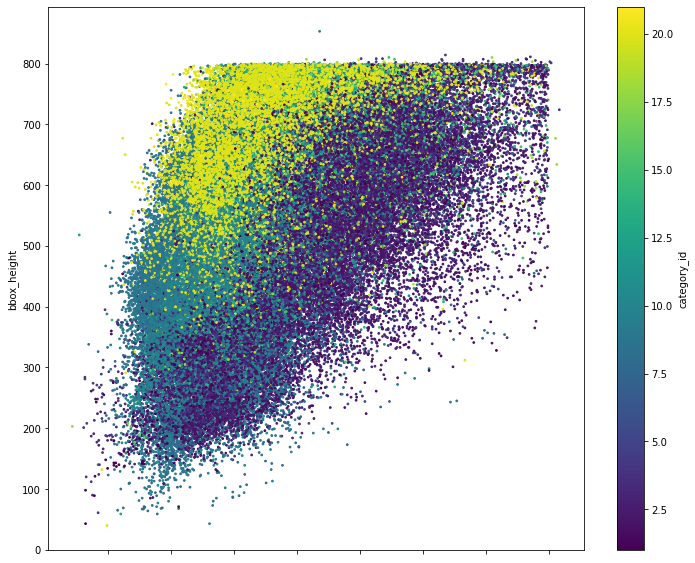

In [47]:
df_annotations.plot.scatter('bbox_width', 'bbox_height', s=3, c='category_id', colormap='viridis', figsize=(12,10))

In [70]:
merged_annotations = pd.merge(df_images, df_annotations, on='image_id')
(merged_annotations['bbox_x1'] + merged_annotations['bbox_width'] <= merged_annotations['width']).value_counts()


True     112636
False        32
dtype: int64

In [71]:
(merged_annotations['bbox_y1'] + merged_annotations['bbox_height'] <= merged_annotations['height']).value_counts()

True     112617
False        51
dtype: int64

In [9]:
from collections import defaultdict
size_counter = defaultdict(int)

for image in test_data.get('images'):
    size_counter[(image.get('width'), image.get('height'))] += 1

print(size_counter)

defaultdict(<class 'int'>, {(800, 800): 7995, (900, 900): 5})
